In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

In [2]:
# Load the data from the CSV file
oil_data = pd.read_csv(os.path.join(os.getcwd(), "data", "oil.csv"))

Descriptive Statistics:
 count    261.000000
mean      75.947395
std        4.509977
min       65.140000
25%       72.530000
50%       76.340000
75%       78.660000
max       86.100000
Name: Price, dtype: float64

Skewness:  0.014371621324319414 (positively skewed)


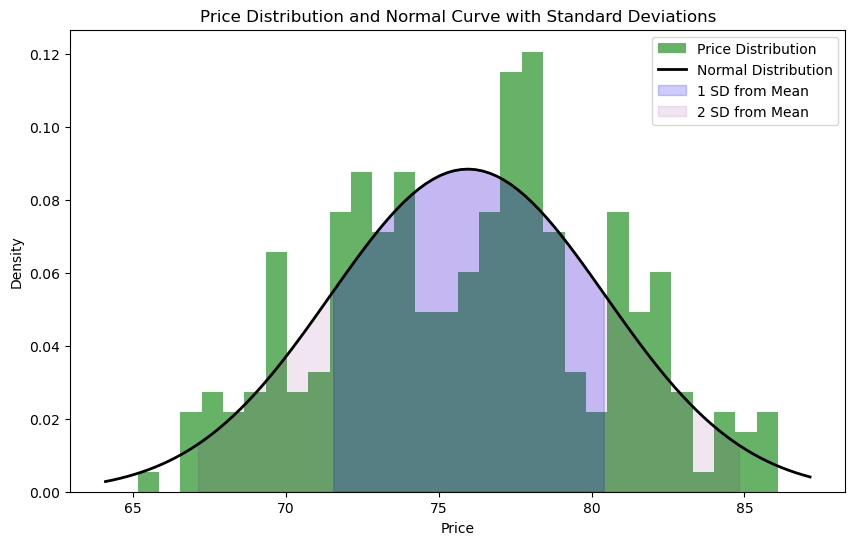

Percentage of data within 1 SD of the mean: 64.37%
Percentage of data within 2 SD of the mean: 97.32%


In [3]:

# Convert the 'Price' column to numeric, handling any missing values
oil_data['Price'] = pd.to_numeric(oil_data['Price'], errors='coerce').dropna()

# Descriptive statistics
mean_price = oil_data['Price'].mean()
std_dev_price = oil_data['Price'].std()
skewness = skew(oil_data['Price'])
desc_stats = oil_data['Price'].describe()

# Determine skewness direction
skew_direction = 'positively skewed' if skewness > 0 else 'negatively skewed'

# Print descriptive statistics and skewness information
print("Descriptive Statistics:\n", desc_stats)
print("\nSkewness: ", skewness, f"({skew_direction})")

# Plot the data distribution and normal curve
plt.figure(figsize=(10, 6))

# Plot histogram of prices
oil_data['Price'].plot(kind='hist', bins=30, density=True, alpha=0.6, color='g', label='Price Distribution')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_price, std_dev_price)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Shade 1 SD region
plt.fill_between(x, p, where=(x > mean_price - std_dev_price) & (x < mean_price + std_dev_price), color='blue', alpha=0.2, label='1 SD from Mean')

# Shade 2 SD region
plt.fill_between(x, p, where=(x > mean_price - 2 * std_dev_price) & (x < mean_price + 2 * std_dev_price), color='purple', alpha=0.1, label='2 SD from Mean')

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution and Normal Curve with Standard Deviations")
plt.legend()

# Show the plot
plt.show()

# Calculate percentages within 1 and 2 SD of the mean
within_1_sd = np.mean((oil_data['Price'] > mean_price - std_dev_price) & (oil_data['Price'] < mean_price + std_dev_price)) * 100
within_2_sd = np.mean((oil_data['Price'] > mean_price - 2 * std_dev_price) & (oil_data['Price'] < mean_price + 2 * std_dev_price)) * 100

print(f"Percentage of data within 1 SD of the mean: {within_1_sd:.2f}%")
print(f"Percentage of data within 2 SD of the mean: {within_2_sd:.2f}%")


In [4]:
btc_data = pd.read_csv(os.path.join(os.getcwd(), "data", "btc.csv"))

# Clean numeric columns by removing commas and converting to float
for col in ['Price', 'Open', 'High', 'Low']:
    btc_data[col] = pd.to_numeric(btc_data[col].str.replace(',', ''), errors='coerce')


Descriptive Statistics:
 count      367.000000
mean     58114.555586
std      10791.848940
min      35549.300000
25%      47442.850000
50%      61685.300000
75%      66687.100000
max      78608.400000
Name: Price, dtype: float64

Skewness:  -0.6326456981353679 (negatively skewed)


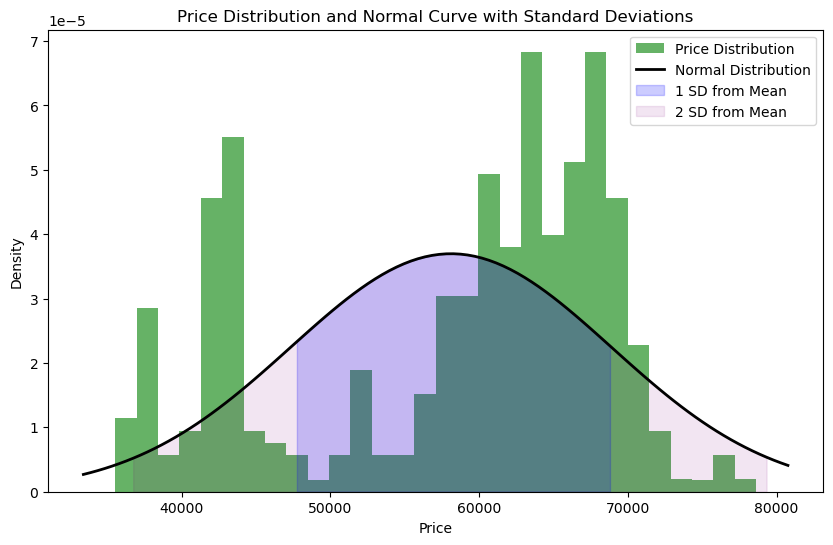

Percentage of data within 1 SD of the mean: 62.94%
Percentage of data within 2 SD of the mean: 98.91%


In [5]:

# Convert the 'Price' column to numeric, handling any missing values
btc_data['Price'] = pd.to_numeric(btc_data['Price'], errors='coerce').dropna()

# Descriptive statistics
mean_price = btc_data['Price'].mean()
std_dev_price = btc_data['Price'].std()
skewness = skew(btc_data['Price'])
desc_stats = btc_data['Price'].describe()

# Determine skewness direction
skew_direction = 'positively skewed' if skewness > 0 else 'negatively skewed'

# Print descriptive statistics and skewness information
print("Descriptive Statistics:\n", desc_stats)
print("\nSkewness: ", skewness, f"({skew_direction})")

# Plot the data distribution and normal curve
plt.figure(figsize=(10, 6))

# Plot histogram of prices
btc_data['Price'].plot(kind='hist', bins=30, density=True, alpha=0.6, color='g', label='Price Distribution')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_price, std_dev_price)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Shade 1 SD region
plt.fill_between(x, p, where=(x > mean_price - std_dev_price) & (x < mean_price + std_dev_price), color='blue', alpha=0.2, label='1 SD from Mean')

# Shade 2 SD region
plt.fill_between(x, p, where=(x > mean_price - 2 * std_dev_price) & (x < mean_price + 2 * std_dev_price), color='purple', alpha=0.1, label='2 SD from Mean')

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution and Normal Curve with Standard Deviations")
plt.legend()

# Show the plot
plt.show()

# Calculate percentages within 1 and 2 SD of the mean
within_1_sd = np.mean((btc_data['Price'] > mean_price - std_dev_price) & (btc_data['Price'] < mean_price + std_dev_price)) * 100
within_2_sd = np.mean((btc_data['Price'] > mean_price - 2 * std_dev_price) & (btc_data['Price'] < mean_price + 2 * std_dev_price)) * 100

print(f"Percentage of data within 1 SD of the mean: {within_1_sd:.2f}%")
print(f"Percentage of data within 2 SD of the mean: {within_2_sd:.2f}%")
